In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# About Dataset

In [3]:
# Global Variable
file_path = "transformed_data.csv"

In [4]:
# Load Dataset
df = pd.read_csv(file_path)
df

,label,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21
0,jempol,165,187,139,127,100,73,69,32,55,...,52,177,67,212,27,204,46,204,65,204
1,jempol,166,179,139,120,98,69,65,31,46,...,56,173,69,209,30,203,50,203,70,202
2,jempol,165,181,139,120,97,70,64,31,48,...,54,172,68,207,28,200,48,200,68,200
3,jempol,165,179,138,120,97,70,65,31,49,...,55,172,69,208,29,201,49,200,69,200
4,jempol,166,180,139,121,97,70,64,32,49,...,56,173,70,209,28,202,49,201,69,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11408,telunjuk,0,46,5,24,19,5,36,0,49,...,41,36,35,52,53,48,47,47,38,48
11409,telunjuk,0,46,5,24,19,6,36,0,48,...,43,37,36,52,54,48,48,47,39,48
11410,telunjuk,0,47,5,24,19,6,37,0,50,...,43,37,37,53,54,48,48,47,39,49
11411,telunjuk,0,46,5,23,19,5,37,0,49,...,43,37,37,52,54,48,48,46,39,48


In [5]:
# Label
labels = df['label'].unique()
print(labels)

['jempol' 'kelingking' 'metal' 'pistol' 'telpon' 'telunjuk']


In [6]:
# Jumlah data setiap label
label_counts = df['label'].value_counts()
print(label_counts)

label
pistol        1930
telunjuk      1925
kelingking    1895
metal         1892
telpon        1889
jempol        1882
Name: count, dtype: int64


# Visualisasi Data

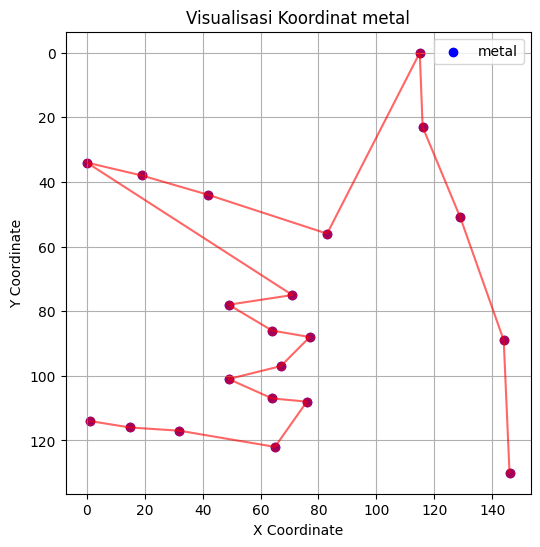

In [7]:
label_to_visualize = 'metal'
df_sample = df[df['label'] == label_to_visualize].iloc[10]  # Ambil satu contoh data

# Ekstrak koordinat x dan y
x_coords = [df_sample[f'x{i}'] for i in range(1, 22)]
y_coords = [df_sample[f'y{i}'] for i in range(1, 22)]

# Buat scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords, color='blue', label=label_to_visualize)
plt.plot(x_coords, y_coords, linestyle='-', marker='o', color='red', alpha=0.6)

# Konfigurasi tampilan plot
plt.gca().invert_yaxis()  # Membalik sumbu Y agar sesuai dengan tampilan gambar
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Visualisasi Koordinat {label_to_visualize}')
plt.legend()
plt.grid()
plt.show()

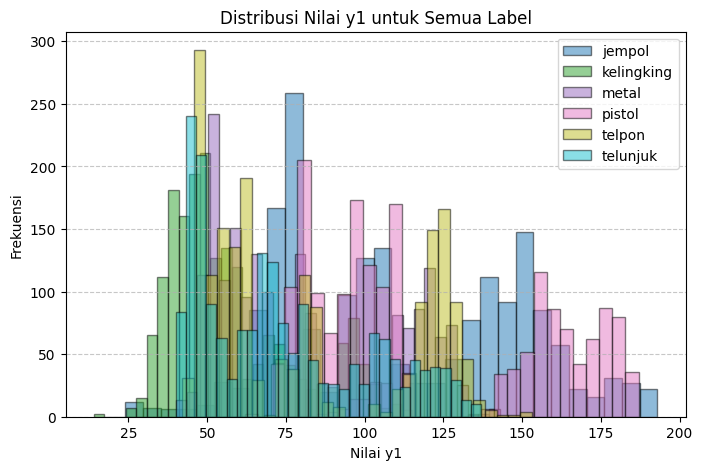

In [8]:
selected_feature = "y1"

plt.figure(figsize=(8, 5))
labels = df['label'].unique()
colors = plt.get_cmap('tab10', len(labels))

for i, label in enumerate(labels):
    subset = df[df['label'] == label]
    plt.hist(subset[selected_feature], bins=30, alpha=0.5, label=label, color=colors(i), edgecolor='black')

plt.xlabel(f'Nilai {selected_feature}')
plt.ylabel('Frekuensi')
plt.title(f'Distribusi Nilai {selected_feature} untuk Semua Label')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

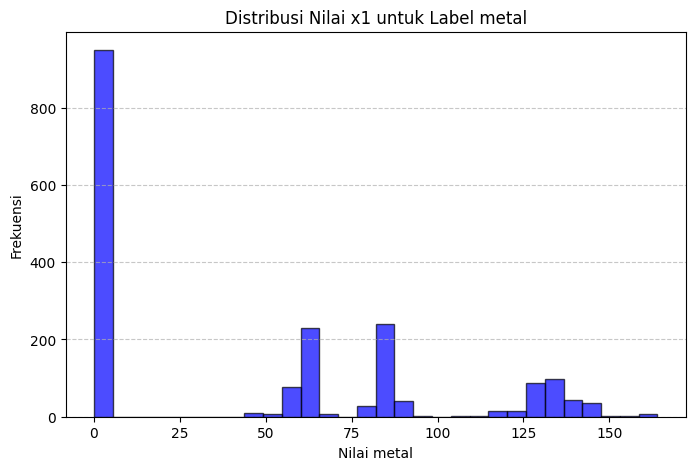

In [9]:
selected_feature = "x1"
selected_label = 'metal'

selected_df = df[df['label'] == selected_label]

# Visualisasi distribusi nilai x1 untuk label tertentu
plt.figure(figsize=(8, 5))
plt.hist(selected_df[selected_feature], bins=30, color='blue', alpha=0.7, edgecolor='black')

# Konfigurasi tampilan plot
plt.xlabel(f'Nilai {selected_label}')
plt.ylabel('Frekuensi')
plt.title(f'Distribusi Nilai {selected_feature} untuk Label {selected_label}')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Modeling

In [10]:
# Ubah Label menjadi numerik
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
df

,label,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21
0,0,165,187,139,127,100,73,69,32,55,...,52,177,67,212,27,204,46,204,65,204
1,0,166,179,139,120,98,69,65,31,46,...,56,173,69,209,30,203,50,203,70,202
2,0,165,181,139,120,97,70,64,31,48,...,54,172,68,207,28,200,48,200,68,200
3,0,165,179,138,120,97,70,65,31,49,...,55,172,69,208,29,201,49,200,69,200
4,0,166,180,139,121,97,70,64,32,49,...,56,173,70,209,28,202,49,201,69,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11408,5,0,46,5,24,19,5,36,0,49,...,41,36,35,52,53,48,47,47,38,48
11409,5,0,46,5,24,19,6,36,0,48,...,43,37,36,52,54,48,48,47,39,48
11410,5,0,47,5,24,19,6,37,0,50,...,43,37,37,53,54,48,48,47,39,49
11411,5,0,46,5,23,19,5,37,0,49,...,43,37,37,52,54,48,48,46,39,48


In [14]:
df_test = label_encoder.inverse_transform(df['label'].values)
df_test


array(['jempol', 'jempol', 'jempol', ..., 'telunjuk', 'telunjuk',
       'telunjuk'], dtype=object)

In [15]:
# Pisahkan Feature dan Label
X = df.drop(columns=['label'])
y = df['label']

In [16]:
# Normalisasi fitur agar SVM bekerja optimal
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
# Bagi data menjadi 80 / 20 dimana 80 training dan 20 testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Buat Model SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
# Kernel 'rbf' digunakan karena seringkali lebih baik dalam menangani data yang tidak terpisah secara linear.
# Parameter C=1.0 adalah nilai default yang memberikan keseimbangan antara margin lebar dan tingkat kesalahan.
# Gamma='scale' secara otomatis menyesuaikan nilai gamma berdasarkan jumlah fitur, sehingga lebih optimal dibanding nilai tetap.
svm_model.fit(X_train, y_train)

SVC()

## Simpan Model

In [19]:
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

## Testing Model

In [20]:
# Prediksi dan evaluasi model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred, target_names=[str(cls) for cls in label_encoder.classes_]))

Accuracy: 1.00
              precision    recall  f1-score   support

      jempol       0.99      1.00      1.00       392
  kelingking       1.00      1.00      1.00       386
       metal       1.00      1.00      1.00       378
      pistol       1.00      1.00      1.00       387
      telpon       1.00      0.99      1.00       348
    telunjuk       1.00      1.00      1.00       392

    accuracy                           1.00      2283
   macro avg       1.00      1.00      1.00      2283
weighted avg       1.00      1.00      1.00      2283



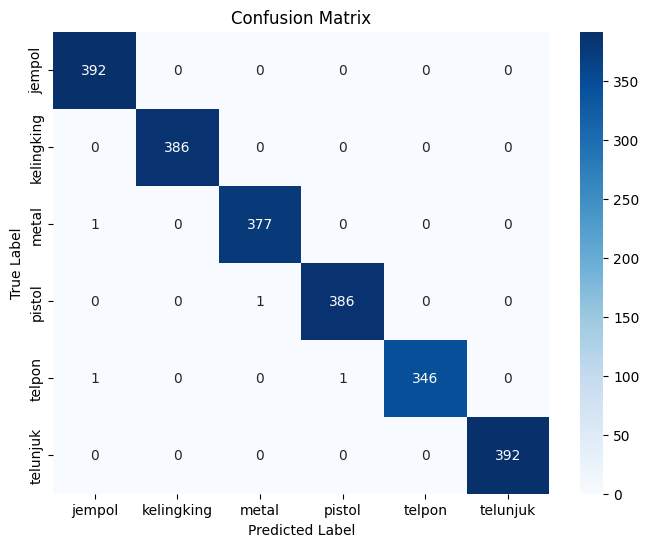

In [21]:
# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()